In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

In [12]:
data_path = f'/gxfs_work/geomar/smomw355/model_data/ocean-only/{experiment_name}/nemo/'
mesh_mask = xr.open_dataset(data_path + 'suppl/2_INALT60.L120-KRS0020_mesh_mask.nc')

ds_ACT_coords = xr.open_dataset('/gxfs_work/geomar/smomw523/eddytools/CHRISTINA_Parcels_sections_ACT.nc')
line_left_lon = ds_ACT_coords.lon.where(ds_ACT_coords.section_number == 5, drop=True).values
line_left_lat = ds_ACT_coords.lat.where(ds_ACT_coords.section_number == 5, drop=True).values
line_up_lon = ds_ACT_coords.lon.where(ds_ACT_coords.section_number == 6, drop=True).values
line_up_lat = ds_ACT_coords.lat.where(ds_ACT_coords.section_number == 6, drop=True).values
combined_lon = np.concatenate((line_left_lon, line_up_lon))
combined_lat = np.concatenate((line_left_lat, line_up_lat))

In [4]:
sigma = 9
params = 'OW0.5_Npix-600-15000' # 'OW0.5_Npix-1296-32400'
datestart, dateend = "2012-04-10", "2012-05-04"
experiment_name = "INALT60.L120-KRS0020"  
data_resolution = "1d" 

In [5]:
ds = xr.open_dataset(f'/gxfs_work/geomar/smomw523/eddytools/results/{experiment_name}/smoothed/{sigma}/{data_resolution}/Parcels-mask_depths--3_{datestart.replace("-", "")}_{dateend.replace("-", "")}_{params}.nc')

In [6]:
lines_data = [
    {'y': -33.104397, 'y_index': 1034, 'x1': 2.2, 'x2': 4.5, 'label': '1'},
    {'y': -33.5224, 'y_index': 1034, 'x1': 7, 'x2': 10.5, 'label': '2'},
    {'y': -36.000156, 'y_index': 1034, 'x1': 10, 'x2': 12.5, 'label': '3'},
    {'y': -37.1, 'y_index': 1034, 'x1': 15.9, 'x2': 18.3, 'label': '4'},
    {'y': -37.2, 'y_index': 1034, 'x1': 7, 'x2': 11, 'label': '5'},
    {'y': -40, 'y_index': 1034, 'x1': 11.6, 'x2': 14, 'label': '6'},
]

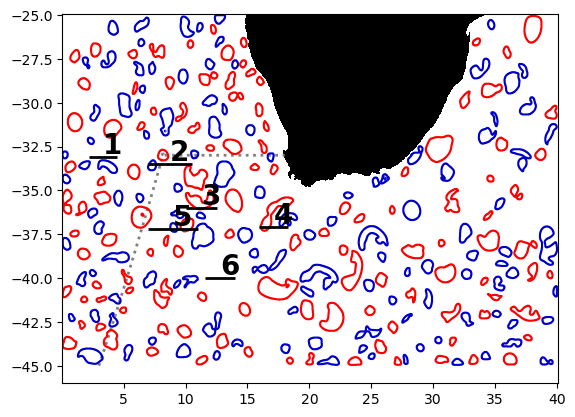

In [14]:
plt.plot(combined_lon, combined_lat, color='gray',linewidth=2,linestyle=':')
plt.contourf(mesh_mask.nav_lon, mesh_mask.nav_lat,
                    mesh_mask.isel(z=0, t=0).tmask.where(mesh_mask.isel(z=0, t=0).tmask == 0), colors="black")
plt.contour(mesh_mask.nav_lon, mesh_mask.nav_lat, ds.isel(time_counter=0, z=0).type, levels=[0.9], colors='mediumblue')
plt.contour(mesh_mask.nav_lon, mesh_mask.nav_lat, -ds.isel(time_counter=0, z=0).type, levels=[0.9], colors='red')
for line in lines_data:
    plt.hlines(line['y'], line['x1'], line['x2'], color='black', linewidth=2)
    plt.text((line['x1']+line['x2'])/2, line['y']+.2, line['label'], fontsize=20, weight='extra bold')

In [ ]:
fig, axes = plt.subplots(nrows=len(lines_data), figsize=(6, 3 * len(lines_data)))

for ax, line in zip(axes, lines_data):
    pcm = ax.pcolormesh(
        mesh_mask.isel(y=line['y_index']).nav_lon, 
        levels, 
        ds.isel(time_counter=0, y=line['y_index']).type, 
        cmap='bwr_r',
    )

    ax.set_xlim([line['x1'], line['x2']])
    ax.invert_yaxis()  

    ax.set_yscale('function', functions=(lambda y: np.where(y < 500, y, 500 + (y-500)/3),  
                                         lambda y: np.where(y < 500, y, 500 + (y-500)*3)))

    ax.set_title(f"{line['label']}") 

plt.tight_layout()
plt.show()
